In [1]:
# from helper import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from helper import TelecomHelper
from plots import *


In [2]:
Helper = TelecomHelper()

In [3]:
cleaned_df = Helper.read_csv(data='../data/cleaned_data.csv')

file read as csv


In [4]:
# top 10 handset_types used by customers from cleaned_df
cleaned_df['handset_type'].value_counts().head(10)

Huawei B528S-23A                19373
Apple iPhone 6S (A1688)          9369
Apple iPhone 6 (A1586)           8967
undefined                        8820
Apple iPhone 7 (A1778)           6240
Apple iPhone Se (A1723)          5151
Apple iPhone 8 (A1905)           4961
Apple iPhone Xr (A2105)          4542
Samsung Galaxy S8 (Sm-G950F)     4404
Apple iPhone X (A1901)           3788
Name: handset_type, dtype: int64

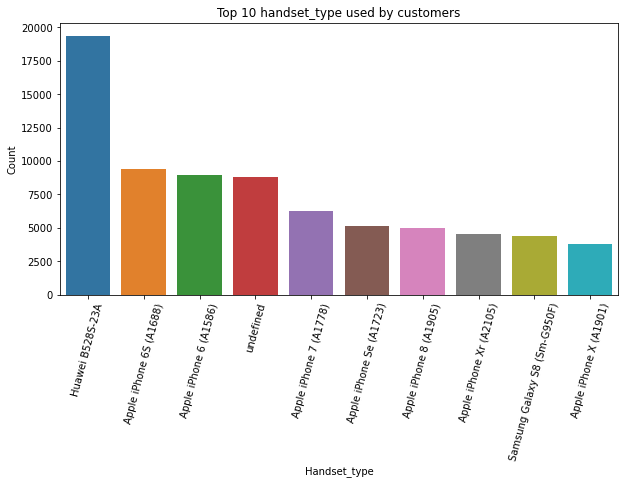

In [5]:
# draw a bar plot of top 10 handset_type used by customers
plt.figure(figsize=(10,5))
sns.barplot(x=cleaned_df['handset_type'].value_counts().head(10).index, y=cleaned_df['handset_type'].value_counts().head(10).values)
plt.title('Top 10 handset_type used by customers')
plt.xlabel('Handset_type')
plt.xticks(rotation=75)
plt.ylabel('Count')
plt.show()


In [6]:
# top 3 handset_manufacturer used by customers from cleaned_df
top_manufacturers = cleaned_df['handset_manufacturer'].value_counts().head(3)

In [7]:
top_manufacturers

Apple      59072
Samsung    39902
Huawei     33755
Name: handset_manufacturer, dtype: int64

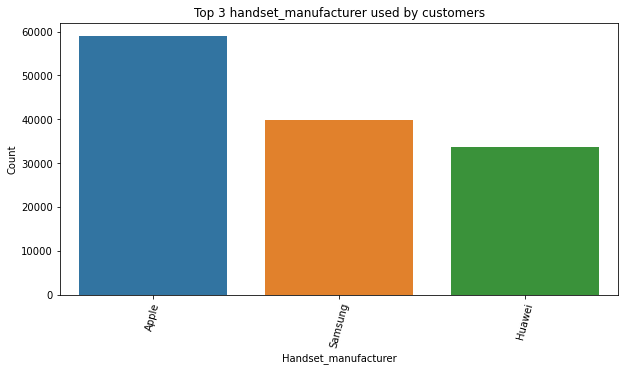

In [8]:
# draw a bar plot of top 3 handset_manufacturer used by customers
plt.figure(figsize=(10,5))
sns.barplot(x=cleaned_df['handset_manufacturer'].value_counts().head(3).index, y=cleaned_df['handset_manufacturer'].value_counts().head(3).values)
plt.title('Top 3 handset_manufacturer used by customers')
plt.xlabel('Handset_manufacturer')
plt.xticks(rotation=75)
plt.ylabel('Count')
plt.show()

In [9]:
for i in top_manufacturers.index:
    print(cleaned_df[cleaned_df['handset_manufacturer'] == i]['handset_type'].value_counts().head(5))

Apple iPhone 6S (A1688)    9369
Apple iPhone 6 (A1586)     8967
Apple iPhone 7 (A1778)     6240
Apple iPhone Se (A1723)    5151
Apple iPhone 8 (A1905)     4961
Name: handset_type, dtype: int64
Samsung Galaxy S8 (Sm-G950F)    4404
Samsung Galaxy A5 Sm-A520F      3673
Samsung Galaxy J5 (Sm-J530)     3664
Samsung Galaxy J3 (Sm-J330)     3431
Samsung Galaxy S7 (Sm-G930X)    3106
Name: handset_type, dtype: int64
Huawei B528S-23A                  19373
Huawei E5180                       2062
Huawei P20 Lite Huawei Nova 3E     2000
Huawei P20                         1471
Huawei Y6 2018                      984
Name: handset_type, dtype: int64


### Recommendation for the marketing team the Markting team should take into account the following brands
<ol>
  <li>Apple</li>
  <li>Samsung</li>
  <li>Huwaie</li>
</ol>

## Task 1.1

In [14]:
sessions = cleaned_df.groupby('msisdn/number').agg({'bearer_id': 'count'})
sessions = sessions.rename(columns= {'bearer_id': 'xDR_sessions'})
sessions.sort_values(by=['xDR_sessions'], ascending = False).head(10)

,xDR_sessions
msisdn/number,
3.362632e+10,18
3.361489e+10,17
3.362578e+10,17
3.365973e+10,16
3.367588e+10,15
3.376054e+10,15
3.366716e+10,13
3.360313e+10,12
3.376041e+10,12


In [18]:
durations = cleaned_df.groupby('msisdn/number').agg({'dur._(ms)': 'sum'})


durations=durations.rename(columns= {'dur._(ms)': 'total_duration(ms)'})
durations.sort_values(by=['total_duration(ms)'], ascending = False).head(10)

,total_duration(ms)
msisdn/number,
3.362578e+10,18553754.0
3.361489e+10,9966898.0
3.376054e+10,9279434.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0
3.366469e+10,6288730.0
3.360313e+10,6287761.0
3.366746e+10,5649882.0
3.376041e+10,5321667.0


In [ ]:
durations = cleaned_df.groupby('msisdn/number').agg({'dur._(ms)': 'sum'})


durations=durations.rename(columns= {'dur._(ms)': 'total_duration(ms)'})
durations.sort_values(by=['total_duration(ms)'], ascending = False).head(10)

In [19]:
total_data_df = cleaned_df[['msisdn/number','total_ul_(bytes)','total_dl_(bytes)']].copy()
total_data_df = total_data_df.groupby('msisdn/number').sum()
total_data_df['total_data(bytes)'] = total_data_df['total_ul_(bytes)'] + total_data_df['total_dl_(bytes)']
total_data_df.sort_values(by=['total_data(bytes)'], ascending = False).head(10)

,total_ul_(bytes),total_dl_(bytes),total_data(bytes)
msisdn/number,,,
3.361489e+10,689483001.0,8.156743e+09,8.846226e+09
3.376054e+10,703478581.0,7.811295e+09,8.514774e+09
3.362578e+10,729577380.0,7.770043e+09,8.499621e+09
3.362632e+10,669650721.0,7.301517e+09,7.971167e+09
3.367588e+10,581568792.0,7.309542e+09,7.891111e+09
3.365973e+10,624260321.0,7.081602e+09,7.705863e+09
3.366646e+10,405060976.0,6.903440e+09,7.308501e+09
3.376041e+10,521518890.0,6.610852e+09,7.132371e+09
3.366471e+10,471244453.0,6.400774e+09,6.872018e+09


In [20]:
cleaned_df["social_media"] = cleaned_df["social_media_dl_(bytes)"] + cleaned_df['social_media_ul_(bytes)']
cleaned_df["google"] = cleaned_df["google_dl_(bytes)"] + cleaned_df["google_ul_(bytes)"]
cleaned_df['email'] = cleaned_df["email_dl_(bytes)"] + cleaned_df["email_ul_(bytes)"]
cleaned_df['youtube'] = cleaned_df["youtube_dl_(bytes)"] + cleaned_df["youtube_ul_(bytes)"]
cleaned_df['netflix'] = cleaned_df["netflix_dl_(bytes)"] + cleaned_df["netflix_ul_(bytes)"]
cleaned_df["gaming"] = cleaned_df["gaming_dl_(bytes)"] + cleaned_df["gaming_ul_(bytes)"]
cleaned_df['other']= cleaned_df["other_dl_(bytes)"]+ cleaned_df["other_ul_(bytes)"]
cleaned_df['total_data'] = cleaned_df['total_dl_(bytes)'] + cleaned_df['total_ul_(bytes)']

In [21]:
app_total_data = cleaned_df[['msisdn/number','social_media','google',
                             'email', 'youtube','netflix', 'gaming','other']].copy()

In [22]:
app_total_data.groupby('msisdn/number').sum().sample(10)

,social_media,google,email,youtube,netflix,gaming,other
msisdn/number,,,,,,,
3.378139e+10,3290209.0,11885164.0,3748991.0,58903920.0,74863206.0,419949786.0,943908693.0
3.362131e+10,2390065.0,1523155.0,3397536.0,19061006.0,27270796.0,182505449.0,586408387.0
3.366928e+10,1570162.0,7918361.0,3512000.0,21057445.0,17843537.0,461283765.0,214374045.0
3.360925e+10,1691328.0,3122070.0,2012358.0,31606095.0,15308182.0,637330856.0,84161441.0
3.366172e+10,1010287.0,12731650.0,4227996.0,13602200.0,32600662.0,728778568.0,419314482.0
3.365825e+10,184629.0,4384663.0,2818814.0,26374832.0,13415932.0,131879801.0,284468373.0
3.365244e+10,2650473.0,5069949.0,2311219.0,22643751.0,40492841.0,591055768.0,493722660.0
3.366896e+10,2306944.0,7154980.0,3382676.0,20223808.0,20216774.0,753421573.0,831778011.0
3.360570e+10,1975930.0,2738066.0,3411402.0,9829802.0,19629048.0,581051715.0,380498007.0
